# 实验二 图像处理基本操作 （直方图部分）
PB19071509 王瑞哲

## >>> 实验原理

数字图像处理(Digital Image Processing)是通过计算机对图像进行去除噪声、增强、复原、分割、提取特征等处理的方法和技术。OpenCV是一个基于Apache2.0许可（开源）发行的跨平台计算机视觉和机器学习软件库，可以运行在Linux、Windows、Android和Mac OS操作系统上。它轻量且高效——由一系列 C 函数和少量 C++ 类构成，同时提供了Python、Ruby、MATLAB等语言的接口，实现了图像处理和计算机视觉方面的很多通用算法。

## >>> 实验目标

本次实验进⾏图像处理的基本操作和底层处理算法，了解数字图像的基本形式和基本滤波操作，具体包括： 

1. 图像读取、写入、平移、旋转、缩放等操作；
2. 图像滤波：平滑（均值滤波 、⾼斯滤波、中值滤波、双边滤波）、边缘提取（Sobel、Canny 、 DOG 、LOG）；
3. 图像特征：灰度直方图、颜色直方图（ RGB 空间、 HSV 空间）、 方向梯度直方图（Histogram Of Gradient）。

## >>> 实验过程

#### 1. 图像读取、写入、平移、旋转、缩放（略）
#### 2. 图像滤波、平滑、边缘提取（略）


#### 3. 图像特征：灰度直方图、颜色直方图（RGB 空间、 HSV 空间）、方向梯度直方图（Histogram Of Gradient）

> 图像特征-灰度直方图

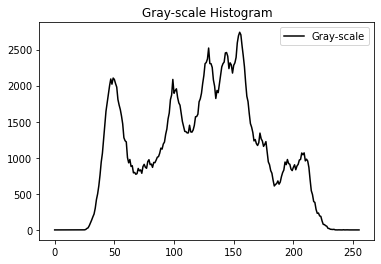

In [17]:
# 灰度直方图
lena_Gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)    # 先转换为灰度图
# 参数：图像、通道序号、掩模、横坐标bin数目、统计像素值区间，参数需带[]括号
hist = cv2.calcHist([lena_Gray], [0], None, [256], [0,255])
plt.plot(hist, 'black', label="Gray-scale")
plt.title("Gray-scale Histogram")
plt.legend()
plt.show()

> 图像特征-RGB直方图

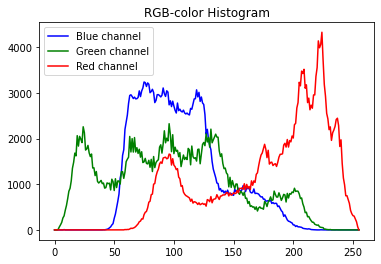

In [18]:
# RGB直方图
hist1 = cv2.calcHist([lena], [0], None, [256], [0,255])
plt.plot(hist1, 'b', label="Blue channel")
hist2 = cv2.calcHist([lena], [1], None, [256], [0,255])
plt.plot(hist2, 'g', label="Green channel")
hist3 = cv2.calcHist([lena], [2], None, [256], [0,255])
plt.plot(hist3, 'r', label="Red channel")
plt.title("RGB-color Histogram")
plt.legend()
plt.show()

> 图像特征-HSV直方图

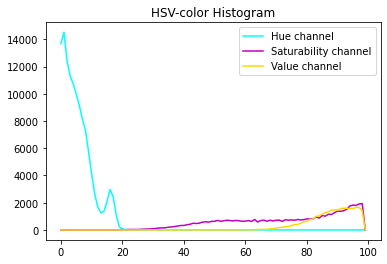

In [19]:
# HSV直方图
lena_HSV = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)    # 先转换为HSV颜色空间
hist1 = cv2.calcHist([lena_HSV], [0], None, [100], [0,99])
plt.plot(hist1, 'cyan', label="Hue channel")  # 色调H
hist2 = cv2.calcHist([lena_HSV], [1], None, [100], [0,99])
plt.plot(hist2, 'm', label="Saturability channel")  # 饱和度S
hist3 = cv2.calcHist([lena_HSV], [2], None, [100], [0,99])
plt.plot(hist3, 'gold', label="Value channel")  # 明度V
plt.title("HSV-color Histogram")
plt.legend()
plt.show()

> 图像特征-方向梯度直方图

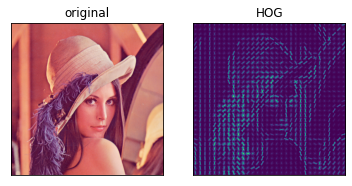

In [20]:
# 方向梯度直方图  使用skimage库
from skimage import feature, exposure
# 参数：图像、角度划分份数，cell内像素数，block内像素数，是否返回可显示图像
fd, hog_image = feature.hog(lena_Gray, orientations=9, pixels_per_cell=(16,16), cells_per_block=(3,3), visualize=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
jshow(hog_image_rescaled, "HOG", need_colortransfer=False)

图像直方图是图像的基本属性之一，也是图像像素数据分布的统计学特征。

利用灰度图像直方图，我们可以设定一些数字化的参数（例如数字照相机会分析图像的灰度直方图，从而可以以此来判断图像的清晰度等等），也可以分析出图像中灰度的变化，进而帮我们确定图像中不同灰度之间的阈值（灰度图分布的两个峰值之间），也可以通过调整灰度直方图分布来调整图像的对比度。

颜色直方图在此基础上更加细致地反映了图像中各种颜色的组成分布。在RGB直方图中，通过修改R、G、B各通道的颜色分布就可以获得多种不同的颜色；而HSV模型对应于画家配色的方法。画家用改变色浓和色深的方法从某种纯色获得不同色调的颜色，在一种纯色中加入白色以改变色浓，加入黑色以改变色深，同时 加入不同比例的白色，黑色即可获得各种不同的色调。

方向梯度直方图特征是一种在计算机视觉和图像处理中用来进行物体检测的特征描述子。HOG在目标检测Object Detection领域应用尤为广泛，因为以求梯度为主要内容的HOG特征能很好地描述局部目标的表象和形状，进而利用支持向量机SVM进行分类和检测任务。

## >>> 实验总结

通过本次实验，我了解了对数字图像处理的基本方法和应用场景，同时熟悉了python语法的使用和OpenCV等库的调用方法。

同时，本次实验因为需要展示大量图片，所以采用Jupyter Notebook的交互式运行方式，同时利用`%matplotlib inline`使得图片能在每一个代码cell运行完毕后即可展示；同时定义了`jshow()`函数并声明了完备的函数变量集使得每次展示图片都可以方便地只调用一次函数便可以得到结果，不需要每次都繁琐地调用多次`plt`函数，极大简化了代码。